In [362]:
import tweepy as tw
import csv
import numpy as np
import re
from IPython.display import display
import os
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
consumer_key= 'xxxx'
consumer_secret= 'xxxx'
access_token= 'xxxx'
access_token_secret= 'xxxx'

In [9]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [10]:
search_words = "Revenge of the Sith attack of the clones -filter:retweets"
date_since = "2019-12-19"

In [36]:
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en", tweet_mode="extended",
              since=date_since).items(2000)


In [22]:
class TweetAnalyzer():
    #Functionality for analyzing and categorizing content from tweets.
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.full_text for tweet in tweets], columns =['Tweets'])
        return df

In [27]:
tweet_analyzer = TweetAnalyzer()
df = tweet_analyzer.tweets_to_data_frame(tweets)

In [423]:
len(df['Tweets'])
print(df.head())

                                              Tweets
0  @ambxrIynn Lol no worries, u should still watc...
1  @Uhbolish @indyJIG Empire Strikes Back\nRogue ...
2  @ambxrIynn Tbh thats not bad, just keep in min...
3  #StarWars  films rankings \nEmpire Strikes Bac...
4  This right here. This is what I'm talking abou...


In [426]:
list=[]
for i in range(len(df['Tweets'])):
    sw = (df['Tweets'][i])
    sw1 = re.findall('[0-9]\.\s?(\D.+)', sw)
    sw2 = [x.strip(' ') for x in sw1]
    list.append(sw2)

In [427]:
pd.set_option('display.max_rows', None)
sw_df1 =  pd.DataFrame(list, columns = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th', '11th', '12th', '13th','14th', '15th'])

In [429]:
columns = ['12th', '13th','14th', '15th']
sw_df1.drop(columns, inplace=True, axis=1)

In [430]:
sw_df1.fillna(value=pd.np.nan, inplace=True)

In [431]:
sw_df1.dropna(subset=['1st','2nd', '3rd', '4th', '5th', '6th'], inplace=True)


In [432]:
sw_df1 = sw_df1.fillna(value={"7th":"Missing", "8th":"Missing","9th":"Missing","10th":"Missing","11th":"Missing",})

In [433]:
sw_df1.replace('(.+?)?([Pp][Hh]\D+[Ee]$|TPM|PM)(.+)?', 'The Phantom Menace', regex=True, inplace=True)
sw_df1.replace('(.+?)?([Aa][Tt]\D+[Ss]$|AOTC|AOC|TAOTC|TAOC)(.+)?', 'Attack of the Clones', regex=True, inplace=True)
sw_df1.replace('(.+?)?([Rr][Ee]\D+[Ii]$|ROTJ|TROTJ|RotJ|ROJ)(.+)?', 'Return of the Jedi', regex=True, inplace=True)
sw_df1.replace('(.+?)?([Rr][Ee]\D+[Hh]$|ROTS|ROS|TROS|TROTS)(.+)?', 'Revenge of the Sith', regex=True, inplace=True)
sw_df1.replace('(.+?)?([Ll][Aa]\D+[Ii]$|TLJ|LJ)(.+)?', 'The Last Jedi', regex=True, inplace=True)
sw_df1.replace('(.+?)?([Nn][Ee]\D+[Ee]$|ANH|NH)(.+)?', 'A New Hope', regex=True, inplace=True)
sw_df1.replace('(.+?)?([Ee][Mm]\D+[Kk]$|Empire|TESB|ESB)(.+)?', 'The Empire Strikes Back', regex=True, inplace=True)
sw_df1.replace('(.+?)?([Rr][Ee]\D+[Ii]$|ROTJ|TROTJ|RotJ|ROJ)(.+)?', 'Return of the Jedi', regex=True, inplace=True)
sw_df1.replace('(.+?)?([Ff][Oo]\D+[Ss]$|TFS|FS)(.+)?', 'The Force Awakens', regex=True, inplace=True)
sw_df1.replace('(.+?)?([Ll][Aa]\D+[Ii]$|TLJ|LJ)(.+)?', 'The Last Jedi', regex=True, inplace=True)
sw_df1.replace('(.+?)?([Rr][Ii]\D+[Rr|*]$|TROS|ROS)(.+)?', 'The Rise of Skywalker', regex=True, inplace=True)
sw_df1.replace('(.+?)?([Rr][Oo]\D+[Ee]$|RO|TRO)(.+)?', 'Rogue One', regex=True, inplace=True)
sw_df1.replace('(.+?)?([Ss][Oo]\D+[Oo])$(.+)?', 'Solo', regex=True, inplace=True)

In [434]:
display(sw_df1.head())

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,11th
5,The Empire Strikes Back,A New Hope,Return of the Jedi,The Force Awakens,The Rise of Skywalker,Revenge of the Sith,The Phantom Menace,The Last Jedi,Attack of the Clones,Missing,Missing
7,The Empire Strikes Back,Attack of the Clones,Revenge of the Sith,The Rise of Skywalker,A New Hope,The Force Awakens,The Last Jedi,Rogue One,Solo,The Phantom Menace,Missing
9,Rogue One,The Last Jedi,Attack of the Clones,The Empire Strikes Back,The Force Awakens,The Phantom Menace,Return of the Jedi,A New Hope,Revenge of the Sith,Rogue One,Solo
16,A New Hope,The Empire Strikes Back,The Rise of Skywalker,The Force Awakens,Return of the Jedi,The Last Jedi,Revenge of the Sith,Attack of the Clones,The Phantom Menace,Missing,Missing
18,The Empire Strikes Back,Return of the Jedi,The Force Awakens,Rogue One,The Rise of Skywalker,The Last Jedi,A New Hope,Revenge of the Sith,Attack of the Clones,The Phantom Menace,Solo


In [344]:
def sw_count(sw_column):
    final_count_list = []
    tpm_count = 0
    aotc_count = 0
    rots_count = 0
    anh_count = 0
    tesb_count = 0
    rotj_count = 0
    tfa_count = 0
    tlj_count = 0
    ros_count = 0
    ro_count = 0
    s_count = 0
    for x in sw_column:
        if x == 'The Phantom Menace':
            tpm_count += 1
        elif x == 'Attack of the Clones':
            aotc_count += 1
        elif x == 'Revenge of the Sith':
            rots_count += 1
        elif x == 'A New Hope':
            anh_count += 1
        elif x == 'The Empire Strikes Back':
            tesb_count += 1 
        elif x == 'Return of the Jedi':
            rotj_count += 1
        elif x == 'The Force Awakens':
            tfa_count += 1
        elif x == 'The Last Jedi':
            tlj_count += 1
        elif x == 'The Rise of Skywalker':
            ros_count += 1
        elif x == 'Rogue One':
            ro_count += 1
        elif x == 'Solo':
            s_count += 1
        else:
            pass
    final_count_list.extend([tpm_count, aotc_count, rots_count, anh_count,tesb_count, rotj_count, tfa_count, tlj_count, ros_count, ro_count, s_count])
    return final_count_list

13 8 62 40 181 28 7 17 7 20 2


In [314]:
def series_to_list(column_name):
    series = sw_df1[column_name]
    list1 = series.tolist()
    return list1

In [348]:
for column in sw_df1:
    columm = str(column)
    sw_list = series_to_list(columm)
    total = sw_count(sw_list)
    print(total)

[13, 8, 62, 40, 213, 28, 7, 17, 7, 20, 2]
[13, 16, 40, 120, 97, 50, 13, 30, 15, 28, 2]
[8, 8, 59, 72, 40, 103, 26, 32, 27, 43, 6]
[17, 9, 58, 64, 21, 86, 48, 16, 35, 58, 10]
[32, 25, 49, 40, 13, 55, 60, 26, 57, 58, 13]
[47, 34, 55, 23, 9, 50, 77, 35, 55, 18, 22]
[53, 30, 38, 19, 8, 25, 81, 41, 47, 30, 40]
[49, 66, 36, 9, 6, 10, 48, 59, 48, 26, 54]
[69, 89, 24, 8, 3, 8, 23, 59, 53, 8, 58]
[71, 64, 9, 7, 5, 5, 18, 38, 27, 7, 34]
[51, 75, 4, 4, 6, 2, 2, 44, 19, 3, 35]


In [399]:
categories = ['The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith', 'A New Hope', 'The Empire Strikes Back', 'Return of the Jedi', 'The Force Awakens', 'The Last Jedi', 'The Rise of Skywalker', 'Rogue One', 'Solo']
data1 = [13, 8, 62, 40, 213, 28, 7, 17, 7, 20, 2]
data2 = [13, 16, 40, 120, 97, 50, 13, 30, 15, 28, 2]
data3 = [8, 8, 59, 72, 40, 103, 26, 32, 27, 43, 6]
data4 = [17, 9, 58, 64, 21, 86, 48, 16, 35, 58, 10]
data5 = [32, 25, 49, 40, 13, 55, 60, 26, 57, 58, 13]
data6 = [47, 34, 55, 23, 9, 50, 77, 35, 55, 18, 22]
data7 = [53, 30, 38, 19, 8, 25, 81, 41, 47, 30, 40]
data8 = [49, 66, 36, 9, 6, 10, 48, 59, 48, 26, 54]
data9 = [69, 89, 24, 8, 3, 8, 23, 59, 53, 8, 58]
data10 = [71, 64, 9, 7, 5, 5, 18, 38, 27, 7, 34]
data11 = [51, 75, 4, 4, 6, 2, 2, 44, 19, 3, 35]
color_set = ('blue', 'tomato', 'bisque', 'springgreen', 'thistle', 'pink', 'skyblue', 'greenyellow', 'chocolate', 'khaki', 'turquoise' )

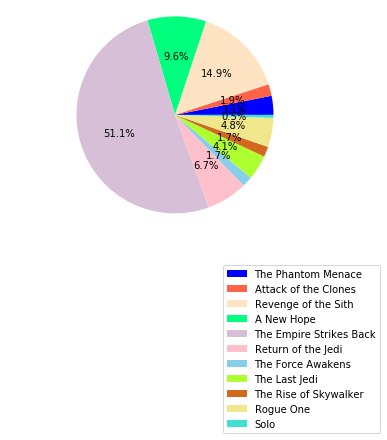

In [400]:
plt.figure(1)
plt.pie(data1, autopct="%0.1f%%", colors=color_set)
plt.axis('equal')
plt.legend(catttt, bbox_to_anchor=(1,0), loc="best",bbox_transform=plt.gcf().transFigure)



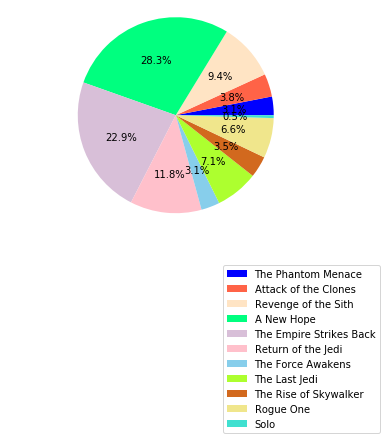

In [402]:
plt.figure(2)
plt.pie(data2, autopct="%0.1f%%", colors=color_set)
plt.axis('equal')
plt.legend(catttt, bbox_to_anchor=(1,0), loc="best",bbox_transform=plt.gcf().transFigure)


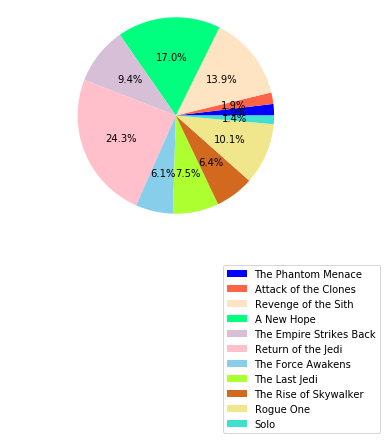

In [403]:
plt.figure(3)
plt.pie(data3, autopct="%0.1f%%", colors=color_set)
plt.axis('equal')
plt.legend(catttt, bbox_to_anchor=(1,0), loc="best",bbox_transform=plt.gcf().transFigure)



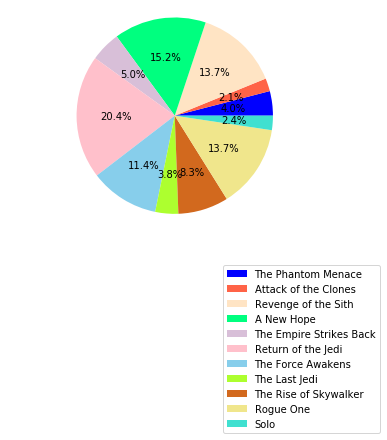

In [404]:
plt.figure(4)
plt.pie(data4, autopct="%0.1f%%", colors=color_set)
plt.axis('equal')
plt.legend(catttt, bbox_to_anchor=(1,0), loc="best",bbox_transform=plt.gcf().transFigure)


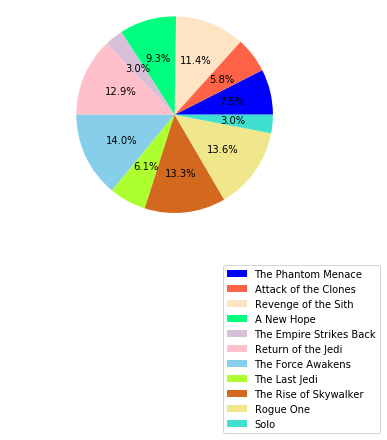

In [405]:
plt.figure(5)
plt.pie(data5, autopct="%0.1f%%", colors=color_set)
plt.axis('equal')
plt.legend(catttt, bbox_to_anchor=(1,0), loc="best",bbox_transform=plt.gcf().transFigure)


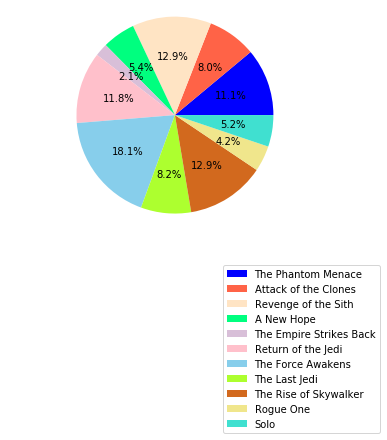

In [406]:
plt.figure(6)
plt.pie(data6, autopct="%0.1f%%", colors=color_set)
plt.axis('equal')
plt.legend(catttt, bbox_to_anchor=(1,0), loc="best",bbox_transform=plt.gcf().transFigure)


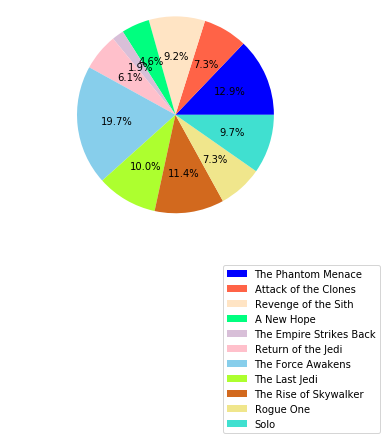

In [407]:
plt.figure(7)
plt.pie(data7, autopct="%0.1f%%", colors=color_set)
plt.axis('equal')
plt.legend(catttt, bbox_to_anchor=(1,0), loc="best",bbox_transform=plt.gcf().transFigure)


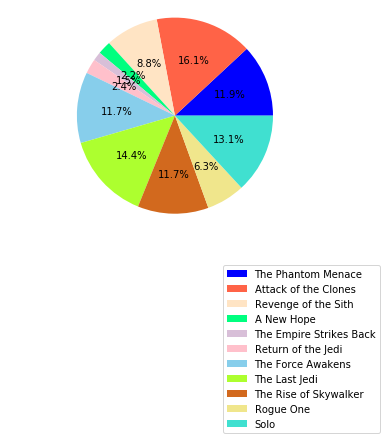

In [408]:
plt.figure(8)
plt.pie(data8, autopct="%0.1f%%", colors=color_set)
plt.axis('equal')
plt.legend(catttt, bbox_to_anchor=(1,0), loc="best",bbox_transform=plt.gcf().transFigure)

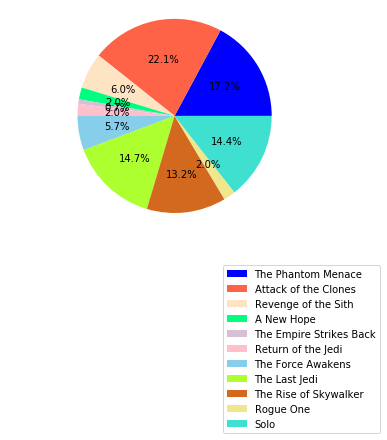

In [409]:
plt.figure(9)
plt.pie(data9, autopct="%0.1f%%", colors=color_set)
plt.axis('equal')
plt.legend(catttt, bbox_to_anchor=(1,0), loc="best",bbox_transform=plt.gcf().transFigure)


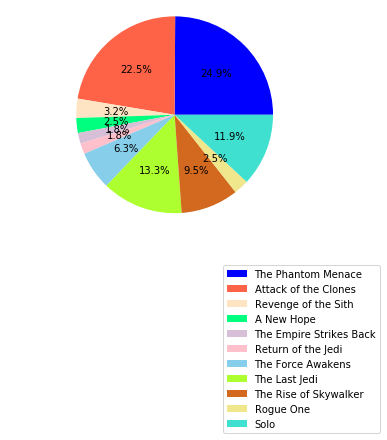

In [410]:
plt.figure(10)
plt.pie(data10, autopct="%0.1f%%", colors=color_set)
plt.axis('equal')
plt.legend(catttt, bbox_to_anchor=(1,0), loc="best",bbox_transform=plt.gcf().transFigure)


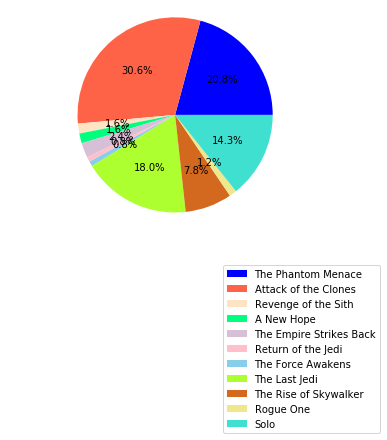

In [411]:
plt.figure(11)
plt.pie(data11, autopct="%0.1f%%", colors=color_set)
plt.axis('equal')
plt.legend(catttt, bbox_to_anchor=(1,0), loc="best",bbox_transform=plt.gcf().transFigure)